### Build a Simple Workflow or Graph using LangGraph

#### Define the State

In [3]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

### Define the Nodes
Nodes are just Python Functions

The first positional argument is the state, as defined above

In [ ]:
def start_play(state:State):
    print(" Start Play Node Has Been Called")
    return{"graph_info":state["graph_info"]+ " I'm Planning to Play"}


def cricket(state:State):
    print(" Cricket Node Has Been Called")
    return{"graph_info":state["graph_info"]+ " Cricket"}

def badmiton(state:State):
    print(" Badmiton Node Has Been Called")
    return{"graph_info":state["graph_info"]+ " Badmiton"}

    

### Define the Logic(Decider Function)

In [7]:
import random
from typing import Literal

def random_play(state:State)->Literal ["cricket","badmiton"]:
    graph_info = state["graph_info"]
    
    if random.random()>0.5:
        return "cricket"
    else:
        return "badmiton"

### Graph Construction

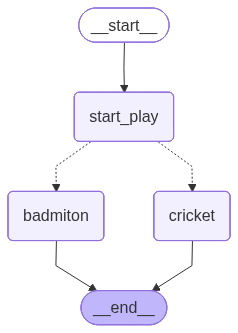

In [8]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Building The Graph
graph = StateGraph(State)

## Add the Node
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badmiton",badmiton)

## Connect the Graph(Edges)
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badmiton",END)

#Compile the Graph
graph_builder = graph.compile()

## draw the Graph

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
## Invoke the Graph

graph_builder.invoke({"graph_info":"My Name is Husen"})

 Start Play Node Has Been Called
 Badmiton Node Has Been Called


{'graph_info': "My Name is Husen I'm Planning to Play Badmiton"}